# Análise Exploratória de Dados


### Introdução
Este trabalho tem como finalidade extrair de um dataset dados relevantes sobre um determinado grupo de jogadores da NBA, analisando e agrupando para gerar valores estatísticos e fatores que levam ao entendimento da influência técnica desses jogadores.


> Configuração de importes e parâmetros ⬇

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats

In [ ]:
plt.rcParams['figure.figsize'] = (16, 10)
plt.rcParams['axes.axisbelow'] = True 
plt.rcParams['axes.grid'] = True
plt.rcParams['axes.labelsize'] = 16
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.spines.bottom'] = True
plt.rcParams['axes.spines.left'] = True
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['axes.ymargin'] = 0.1

plt.rcParams['font.family'] = 'serif'

plt.rcParams['grid.color'] = 'lightgrey'
plt.rcParams['grid.linewidth'] = .1

plt.rcParams['xtick.bottom'] = True
plt.rcParams['xtick.direction'] = 'out' 
plt.rcParams['xtick.labelsize'] = 16
plt.rcParams['xtick.major.size'] = 12
plt.rcParams['xtick.major.width'] = 1
plt.rcParams['xtick.minor.size'] = 6
plt.rcParams['xtick.minor.width'] = 1
plt.rcParams['xtick.minor.visible'] = True

plt.rcParams['ytick.direction'] = 'out'
plt.rcParams['ytick.labelsize'] = 16
plt.rcParams['ytick.left'] = True
plt.rcParams['ytick.major.size'] = 12
plt.rcParams['ytick.major.width'] = 1
plt.rcParams['ytick.minor.size'] = 6
plt.rcParams['ytick.minor.width'] = 1
plt.rcParams['ytick.minor.visible'] = True

plt.rcParams['legend.fontsize'] = 16

plt.rcParams['lines.linewidth'] = 4
plt.rcParams['lines.markersize'] = 80

plt.style.use('tableau-colorblind10')
plt.ion();

> Organização dos dados parar vizualização

### Materias e Métodos
Esse conjunto de dados diante de um array bidimensional foi extraído do site ["Kaggle"](https://www.kaggle.com/datasets/iabdulw/nba-player-performance-stats?resource=download), tratando-se de dados estatísticos de cada jogar presente na NPA.

Os dados foram extraídos usando a biblioteca BeautifulSoup em Python e os dados foram armazenados em um Pandas DataFrame. Os dados foram limpos e processados para remover colunas ou linhas desnecessárias, e os tipos de dados das colunas foram verificados e corrigidos quando necessário, tendo assim um dado melhor estruturado para análise desse trabalho.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/CaioMC/Dataset_NBA_player/main/nba_data_processed.csv',encoding='iso-8859-1', na_values='unknown')
df.head()

,Player,Pos,Age,Tm,G,GS,MP,FG,FGA,FG%,...,FT%,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS
0,Precious Achiuwa,C,23.0,TOR,38.0,11.0,23.3,3.9,8.1,0.482,...,0.689,2.0,4.6,6.6,1.0,0.6,0.7,1.2,2.1,10.2
1,Steven Adams,C,29.0,MEM,42.0,42.0,27.0,3.7,6.3,0.597,...,0.364,5.1,6.5,11.5,2.3,0.9,1.1,1.9,2.3,8.6
2,Bam Adebayo,C,25.0,MIA,57.0,57.0,35.0,8.4,15.7,0.536,...,0.800,2.6,7.2,9.8,3.2,1.2,0.8,2.5,2.8,21.2
3,Ochai Agbaji,SG,22.0,UTA,39.0,2.0,15.6,1.8,3.8,0.483,...,0.682,0.7,1.1,1.8,0.6,0.2,0.1,0.3,1.4,5.0
4,Santi Aldama,PF,22.0,MEM,56.0,18.0,22.0,3.3,7.0,0.474,...,0.729,1.0,3.6,4.6,1.2,0.7,0.7,0.7,1.9,9.4


Variáveis presentes:


1. Jogador: string - nome do jogador
2. Pos ( Posição ): string - posição jogada pelo jogador
3. Idade: número inteiro - idade do jogador em 1 de fevereiro de 2023
4. Tm ( Equipe ): string - equipe à qual o jogador pertence
5. G ( Jogos jogados ): número inteiro - número de jogos jogados pelo jogador
6. Jogos GS ( Iniciados ): número inteiro - número de jogos iniciados pelo jogador
7. MP ( Minutos reproduzidos ): número inteiro - total de minutos reproduzidos pelo jogador
8. FG ( Objetivos de campo ): número inteiro - número de gols de campo feitos pelo jogador
9. FGA ( Tentativas de gol de campo ): número inteiro - número de tentativas de gol de campo pelo jogador
10. FG% ( Porcentagem do objetivo do campo ): flutuador - porcentagem de gols em campo feitos pelo jogador
11. Objetivos de campo de 3P ( 3 pontos ): número inteiro - número de gols de campo de 3 pontos feitos pelo jogador
12. 3PA ( Tentativas de gol de campo de 3 pontos ): número inteiro - número de tentativas de gol de campo de 3 pontos pelo jogador
13. Porcentagem de meta de campo de 3P% ( 3 pontos ): flutuador - porcentagem de gols de campo de 3 pontos feitos pelo jogador
14. Objetivos de campo de 2P ( 2 pontos ): número inteiro - número de gols de 2 pontos feitos pelo jogador
15. 2PA ( 2 pontos de tentativa de gol de campo ): número inteiro - número de tentativas de gol de campo de 2 pontos pelo jogador
16. Porcentagem de meta de campo de 2P% ( 2 pontos ): flutuador - porcentagem de gols de campo de 2 pontos feitos pelo jogador
17. % de eFG ( Porcentagem efetiva de meta de campo ): flutuador - porcentagem efetiva de meta de campo do jogador
18. FT ( Lança livre ): número inteiro - número de lances livres feitos pelo jogador
19. TLC ( Tentativas de lance livre ): número inteiro - número de tentativas de lance livre pelo jogador
20. FT% ( Porcentagem de lance livre ): flutuador - porcentagem de lances livres feitos pelo jogador
21. ORB ( Rebotes ofensivos ): número inteiro - número de rebotes ofensivos pelo jogador
22. DRB ( Rebotes defensivos ): número inteiro - número de rebotes defensivos pelo jogador
23. TRB ( Total de rebotes ): número inteiro - rebotes totais pelo jogador
24. AST ( Assistências ): número inteiro - número de assistências feitas pelo jogador
25. STL ( Roubos ): número inteiro - número de roubadas de bola feitas pelo jogador
26. BLK ( Blocks ): número inteiro - número de blocos fabricados pelo jogador
27. TOV ( Rotatividade ): número inteiro - número de rotatividade efetuada pelo jogador
28. Faltas ( PF ): número inteiro - número de faltas pessoais feitas pelo jogador
29. Pontos ( PTS ): número inteiro - total de pontos marcados pelo jogador









> 1. **Variáveis qualitativa:** Jogador, Tm e Posição;
> 2. **Variáveis quantitativas:** Idade, G, Jogos GS, MP, FG, FGA, FG%, Objetivos de campo de 3P, 3PA, Porcentagem de meta de campo de 3PA, Objetivos de campo de 3P, 3PA, Porcentagem de meta de campo de 3P, Objetivos de campo de 2P, 2PA, Porcentagem de meta de campo de 2P, % de eFG, FT, TLC, FT%, ORB, DRB, TRB, AST, STL, BLK, TOV, Faltas, Pontos.



> Agora vamos começar a analisar dados estatístivos diante das **variáveis de pontuação (PTS), faltas (PF), roubos (STL) e BLK (Blocks)** com o total de pontos marcados pelo jogador.

In [ ]:
def mean(x):
    return sum(x) / len(x)

In [ ]:
pts = df['PTS']
pf = df['PF']
slt = df['STL']
blk = df['BLK']

data = {
  "PTS": pts,
  "PF": pf,
  "SLT": slt,
  "BLK": blk
}

datas_analiticos = pd.DataFrame(data)
datas_analiticos.dropna()
datas_analiticos

,PTS,PF,SLT,BLK
0,10.2,2.1,0.6,0.7
1,8.6,2.3,0.9,1.1
2,21.2,2.8,1.2,0.8
3,5.0,1.4,0.2,0.1
4,9.4,1.9,0.7,0.7
...,...,...,...,...
644,2.9,0.9,0.4,0.2
645,4.7,1.8,1.1,0.1
646,27.0,1.5,1.1,0.1
647,6.3,3.0,0.3,1.0


In [ ]:
maximo_pts = max(pts) 
maximo_pf = max(pf) 
maximo_slt = max(slt) 
maximo_blk = max(blk) 

minimo_pts = min(pts)
minimo_pf = min(pf)
minimo_slt = min(slt)
minimo_blk = min(blk)

tb = {
    "maximo": ["maximo", "minimo", "media", "mediana", "moda", "desvio padrao", "variancia"],
    "PTS": [maximo_pts, minimo_pts, pts.mean(), pts.median(), stats.mode(pts)[1], np.std(pts), np.var(pts)],
    "PF":  [maximo_pf, minimo_pf, pf.mean(), pf.median(), stats.mode(pf)[1], np.std(pf), np.var(pf)],
    "SLT": [maximo_slt, minimo_slt, slt.mean(), slt.median(), stats.mode(slt)[1], np.std(slt), np.var(slt)],
    "BLK": [maximo_blk, minimo_blk, blk.mean(), blk.median(), stats.mode(blk)[1], np.std(blk), np.var(slt)]
}

tb_show = pd.DataFrame(tb)
tb_show



<ipython-input-7-389398323e3f>:13: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  "PTS": [maximo_pts, minimo_pts, pts.mean(), pts.median(), stats.mode(pts)[1], np.std(pts), np.var(pts)],
<ipython-input-7-389398323e3f>:14: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

,maximo,PTS,PF,SLT,BLK
0,maximo,33.1,4.5,3.2,3.2
1,minimo,0.0,0.0,0.0,0.0
2,media,8.814263,1.695673,0.612019,0.369872
3,mediana,7.0,1.7,0.6,0.3
4,moda,[25],[39],[74],[104]
5,desvio padrao,6.762389,0.827607,0.429706,0.386954
6,variancia,45.729909,0.684933,0.184647,0.184647


## Pontuações

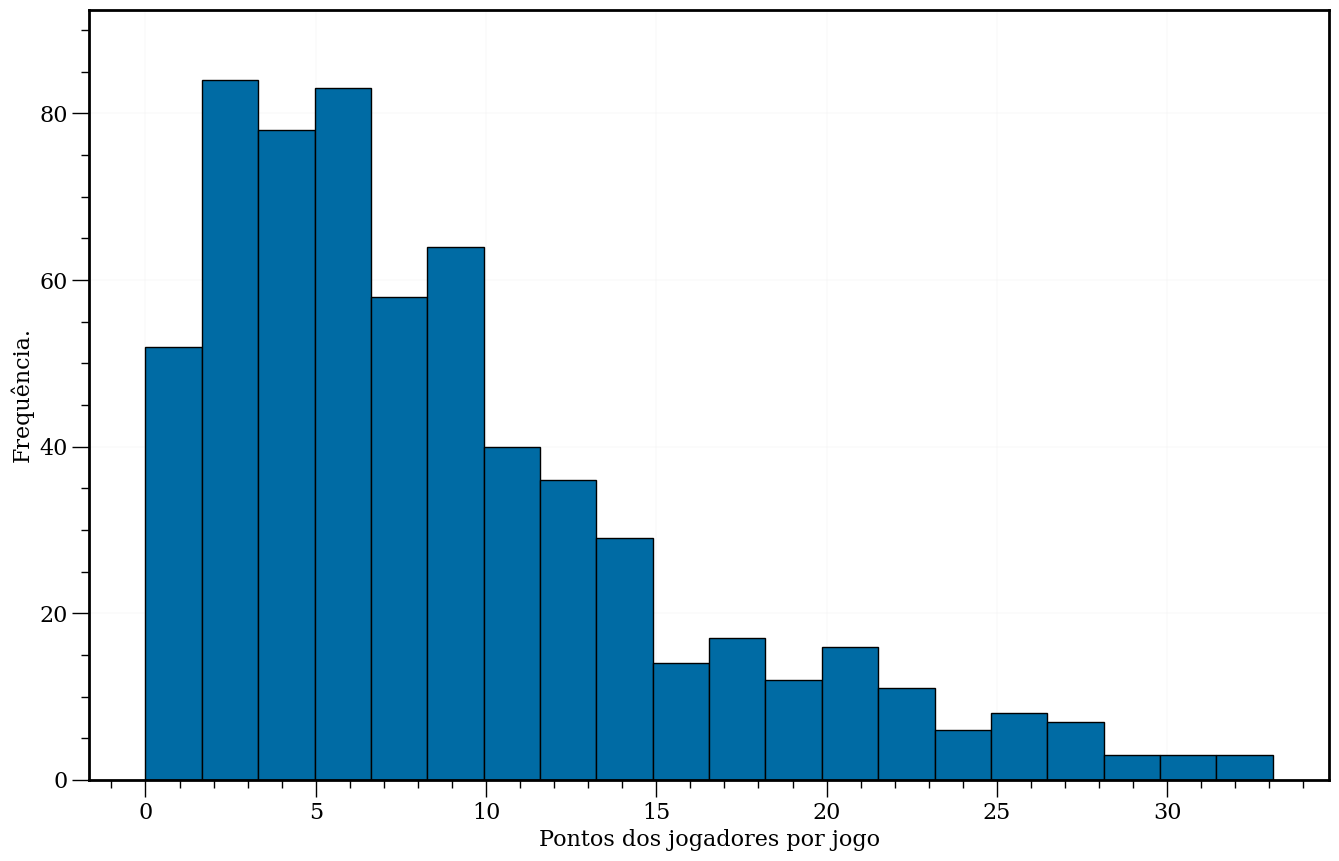

In [ ]:
plt.hist(pts, bins=20, edgecolor='k')
plt.xlabel('Pontos dos jogadores por jogo')
plt.ylabel('Frequência.')
plt.show()

## Relação entre Pontuação X Faltas


Text(0, 0.5, 'Faltas')

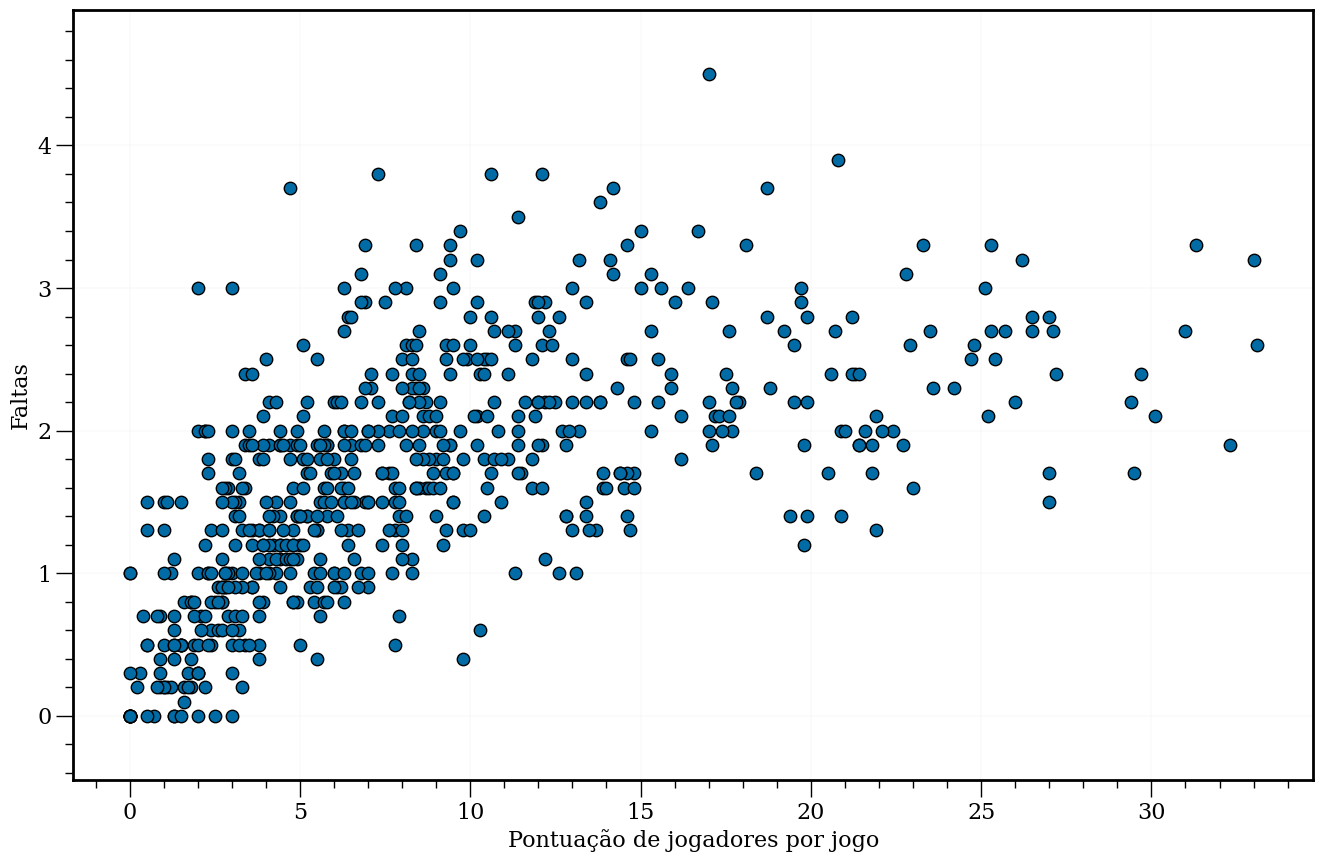

In [ ]:
plt.scatter(pts, pf, edgecolor='k', s=80)
plt.xlabel('Pontuação de jogadores por jogo')
plt.ylabel('Faltas')


## Média de pontuações

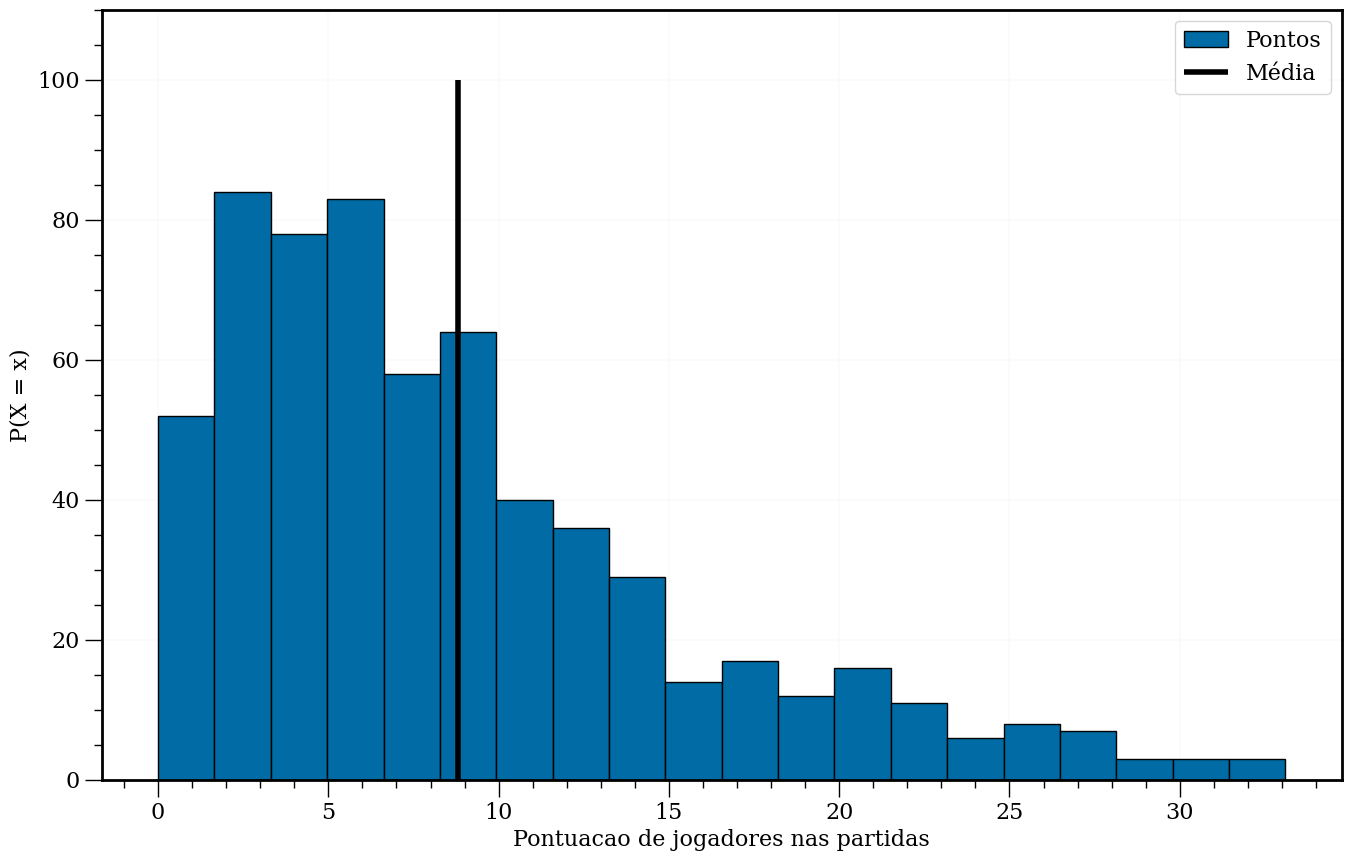

In [ ]:
plt.hist(pts, bins=20, label='Pontos', edgecolor='k')
plt.vlines(pts.mean(), 0, 100, label='Média', edgecolor='k')
plt.xlabel('Pontuacao de jogadores nas partidas')
plt.ylabel('P(X = x)')
plt.legend()
plt.show()

## Conclusão
Portanto, podemos admitir que os jagadores da NBA ficam em um ritmo em sua grande maioria entre 5 a 10 pontos e que grandes pontuações geralmente apresentam pequenas quantidades de faltas.